# Introduction

This notebook showcases my work on the *Financial Inclusion in Africa* starter project by Zindi. The workflow is organized into the following steps:

1. **Loading the datasets**: Importing and preparing the data for analysis.  
2. **Exploratory Data Analysis (EDA)**: Understanding the data through visualizations and statistical summaries.  
3. **Model Development**: Creating and fine-tuning predictive models.  
4. **Model Evaluation**: Assessing model performance using appropriate metrics.  
5. **Test Submission**: Preparing and submitting predictions for evaluation on Zindi's platform.  
6. **Additional Activities**: Exploring potential extensions, such as model deployment.

This structured approach ensures clarity and replicability throughout the project.

Per the rules, the dataset used in this exercise can only be accessed on the Zindi platfom [here](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

# 1. Loading the datasets

In [115]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [116]:
# Let us load the datasets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [117]:
# Let us check the first five rows of the train dataset
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [118]:
# Lets us confirm the definitions of the features
definitions = pd.read_csv('VariableDefinitions.csv')
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


We can confirm that there are 12 independent features in the dataset. The **'bank_account'** column serves as the dependent variable, meaning its values are influenced by the 12 independent variables listed in the definitions file.

# 2. Exploratory Data Analysis

Here, let us try to explore each column in the **train** dataset. We will first start by carrying out some descriptive analysis on the train and test dataset.

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The **train** dataset contains no null values in each of its 13 feature columns. Most of the independent variables (10/12) are of the `object` data type, indicating they consist of non-numeric characters. Similarly, the dependent variable is also of type `object`, as its values are categorical ("Yes" or "No"). These can later be processed using a `LabelEncoder` to convert the dependent variable into binary values (1 for "Yes" and 0 for "No") so they can be used during model training.

In [120]:
# Check if all rows in the train dataset are unique
are_rows_unique = train.duplicated().sum() == 0

if are_rows_unique:
    print("All rows in the dataset are unique.")
else:
    print(f"There are {train.duplicated().sum()} duplicate rows in the dataset.")


All rows in the dataset are unique.


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


Unlike the **train** dataset, the **test** dataset only has 12 columns. The `bank_account` column is missing since that is what we are supposed to submit for evaluation by Zindi once we have created a model.

## a. `country` column

In [122]:
train['country'].describe()

count      23524
unique         4
top       Rwanda
freq        8735
Name: country, dtype: object

The country column has 23,524 rows of data and 4 unique values with the modal value being Rwanda that appears 8,735 times.

In [123]:
# Finding out unique values in the country column
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

This dataset stems from the above East African countries. Let us confirm the distribution of these countries in the dataset

In [124]:
# Checking distribution of unique values in the country column
train['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

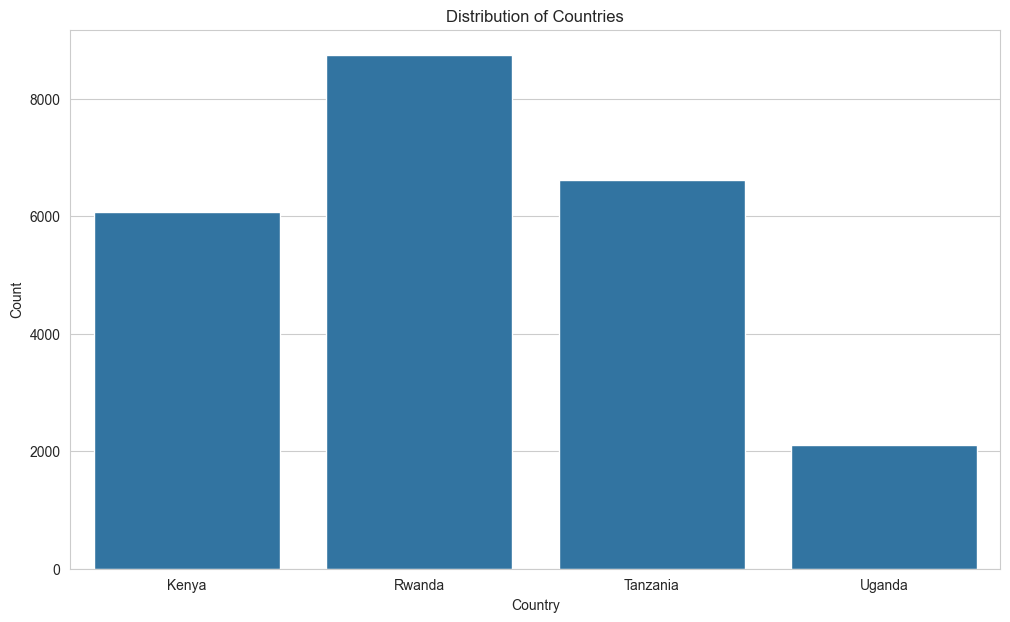

In [125]:
# Visualizing the distribution of the country column
plt.figure(figsize=(12, 7))
sns.countplot(x='country', data=train)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.show()

The **train** dataset's country distribution appears relatively balanced, except for Uganda, which is underrepresented with only 2,101 records. This imbalance could introduce model bias, potentially leading to more accurate predictions for Rwandese nationals compared to Ugandan nationals. To address this, we can employ oversampling techniques, where additional samples of the underrepresented countries are created by duplicating their existing rows. However, since other features may also require oversampling, it is prudent to first identify all such features before proceeding with the process. Additionally, oversampling should be performed exclusively on the training subset(70%)to avoid data leakage, ensuring that the testing set remains a reliable benchmark for evaluating model performance.

Let us confirm whether there is any relationship between the country and whether or not someone has a bank account.

In [126]:
# Checking for any relationship between the country and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['country'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'country' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'country' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 837.961907796301
p-value: 2.5290257400600255e-181
Degrees of Freedom: 3
There is a significant relationship between 'country' and 'bank_account' (p < 0.05).


Let's proceed with oversampling

In [127]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## b. `year` column

In [128]:
train['year'].describe()

count    23524.000000
mean      2016.975939
std          0.847371
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: year, dtype: float64

The training dataset contains data spanning the years 2016 to 2018. Since the year is included as one of the features, it likely plays a significant role in predicting whether someone has a bank account. Given the positive financial growth in these countries during this period, it is reasonable to hypothesize that the number of people with bank accounts from the dataset may have increased over the years. This hypothesis can be tested to validate the assumption.

<Figure size 1200x700 with 0 Axes>

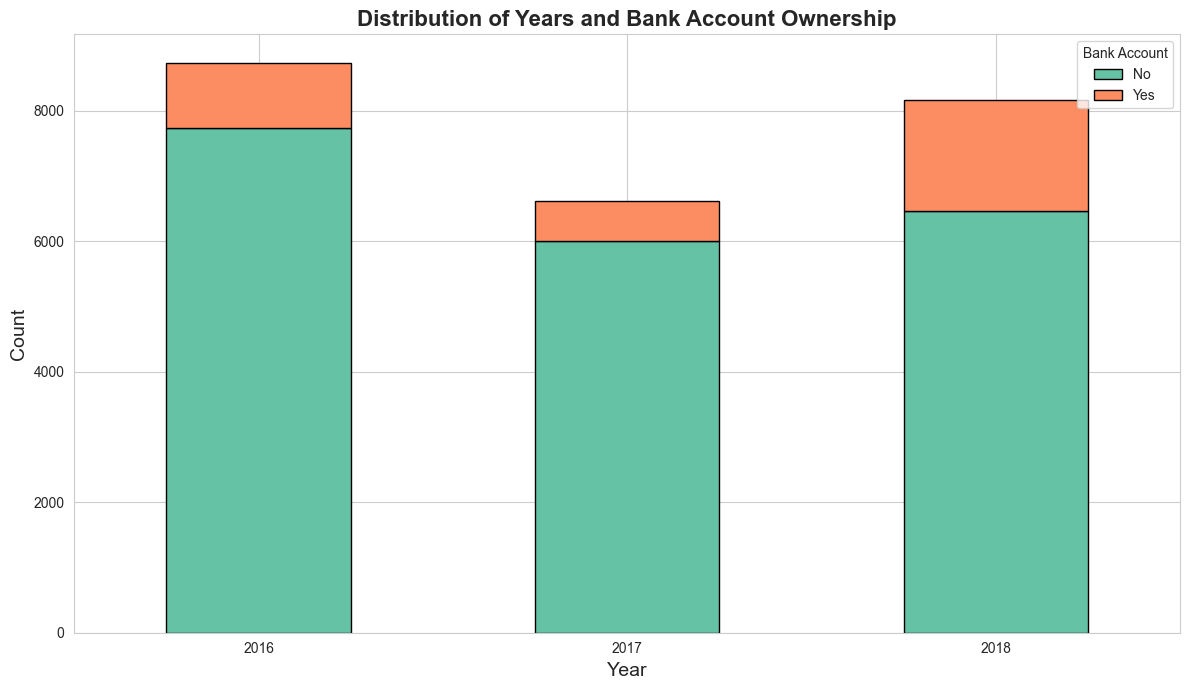

In [129]:
# Preparing the data for the stacked bar chart
year_bank_account = train.groupby(['year', 'bank_account']).size().unstack(fill_value=0)

# Creating the stacked bar chart
plt.figure(figsize=(12, 7))
year_bank_account.plot(
    kind='bar', 
    stacked=True, 
    color=['#66c2a5', '#fc8d62'],  # Custom colors for better visuals
    edgecolor='black',  # Add edges for clarity
    figsize=(12, 7)
)

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Years and Bank Account Ownership', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Bank Account', labels=['No', 'Yes'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

The years are not as evenly distributed. We could do some oversampling of the underrepresented class so we can balance it out to avoid model bias.

In [130]:
# Checking for any relationship between the year and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['year'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'year' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'year' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 488.8145974683432
p-value: 7.165703314454751e-107
Degrees of Freedom: 2
There is a significant relationship between 'year' and 'bank_account' (p < 0.05).


# c. `uniqueid` column- **Dropped**

In [131]:
# Drop the 'uniqueid' column
train = train.drop(columns=['uniqueid'])

# Verify the column has been dropped
print(train.head())

  country  year bank_account location_type cellphone_access  household_size  \
0   Kenya  2018          Yes         Rural              Yes               3   
1   Kenya  2018           No         Rural               No               5   
2   Kenya  2018          Yes         Urban              Yes               5   
3   Kenya  2018           No         Rural              Yes               5   
4   Kenya  2018           No         Urban               No               8   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 24               Female                 Spouse   
1                 70               Female      Head of Household   
2                 26                 Male         Other relative   
3                 34               Female      Head of Household   
4                 26                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary edu

## d. `location_type` column

In [132]:
train['location_type'].describe()

count     23524
unique        2
top       Rural
freq      14343
Name: location_type, dtype: object

The `location_type` column contains no null values and consists of two categories: `rural` and `urban`, with the majority of entries representing `rural` areas.

In [133]:
# Checking distribution of unique values in the location_type column
train['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

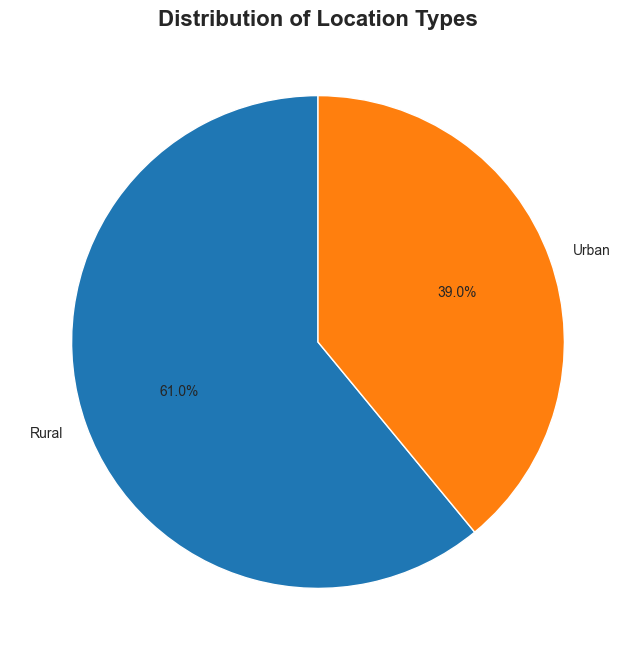

In [134]:
# Visualizing the distribution of the location_type column
plt.figure(figsize=(8, 8))

# Calculating value counts for the location_type column
location_counts = train['location_type'].value_counts()

# Creating the pie chart
plt.pie(
    location_counts, 
    labels=location_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#1f77b4', '#ff7f0e']  # Optional: Custom colors
)

# Adding a title
plt.title('Distribution of Location Types', fontsize=16, fontweight='bold')

# Displaying the plot
plt.show()

The dataset exhibits a noticeable imbalance, with over 5,000 more data points representing `Rural` locations compared to `Urban` locations, indicating a bias toward rural areas. We will also have to carry out oversampling techniques on this dataset.

In [135]:
# Checking for any relationship between the location_type and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['location_type'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'location_type' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'location_type' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 178.72103113792548
p-value: 9.218844615938627e-41
Degrees of Freedom: 1
There is a significant relationship between 'location_type' and 'bank_account' (p < 0.05).


## e. `cellphone_access` column

In [136]:
train['cellphone_access'].describe()

count     23524
unique        2
top         Yes
freq      17454
Name: cellphone_access, dtype: object

The `cellphone_access` column contains no null values and consists of two categories: `Yes` and `No`, with the majority of entries being `Yes`.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\2974118487.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


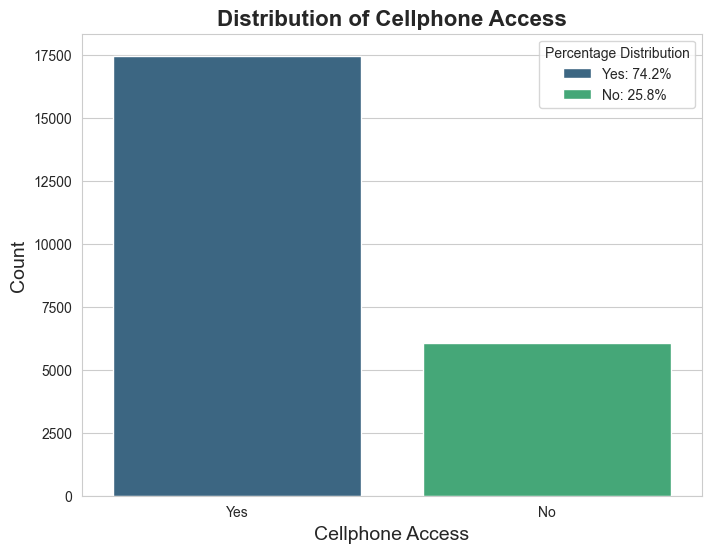

In [137]:
# Calculate percentage distribution
value_counts = train['cellphone_access'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Visualizing the distribution of values in the 'cellphone_access' column
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Creating the countplot
sns.countplot(
    x='cellphone_access', 
    data=train, 
    palette='viridis'
)

# Adding labels and title
plt.xlabel('Cellphone Access', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Cellphone Access', fontsize=16, fontweight='bold')

# Adding a legend with percentage distribution
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels, title='Percentage Distribution', loc='upper right')

# Display the plot
plt.show()

The percentage of users with cellphones is nearly three times higher than those without, indicating a significant imbalance. This could introduce bias into the model, which will need to be addressed as discussed earlier.

In [138]:
# Checking for any relationship between the cellphone_access and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['cellphone_access'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'cellphone_access' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'cellphone_access' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 1032.7610839461552
p-value: 1.3592541989722424e-226
Degrees of Freedom: 1
There is a significant relationship between 'cellphone_access' and 'bank_account' (p < 0.05).


In [139]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## f. `household_size` column

In [140]:
train['household_size'].describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

Number of household members of interviewees ranges between 1-21 with most families ranging between 2-5 household members

In [141]:
# Checking distribution of unique values in the household_size column
train['household_size'].value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

In [142]:
print(train['household_size'].value_counts())
print(train['household_size'].value_counts().get(1, 0))  # Get count of '1'
print(train['household_size'].value_counts().get(21, 0))  # Get count of '21'

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64
3057
1


<Axes: xlabel='household_size', ylabel='Count'>

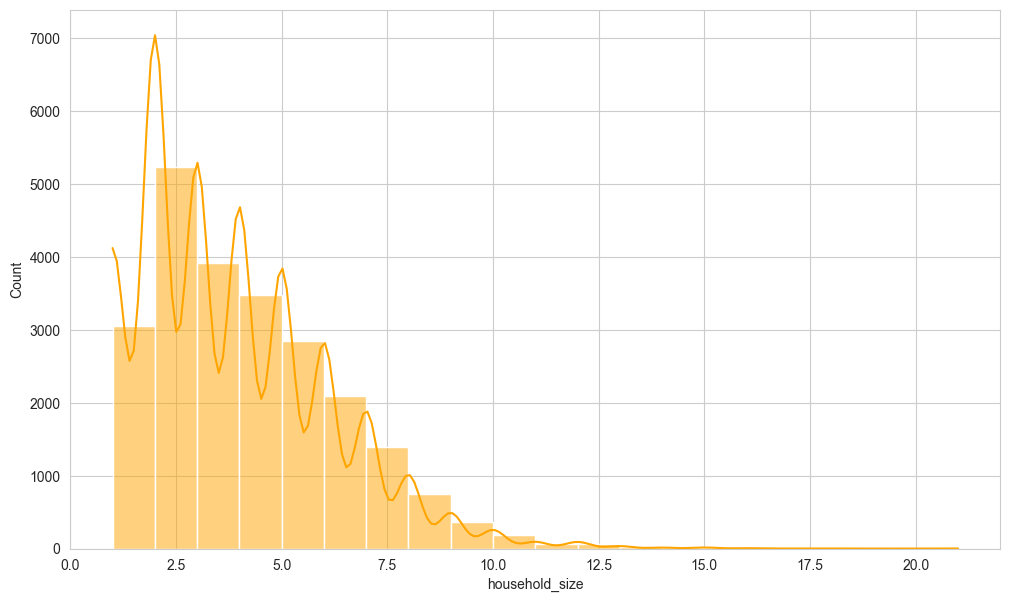

In [143]:
# Vizualizing the distribution of household sizes using a histogram
plt.figure(figsize=(12, 7))
sns.histplot(train['household_size'], bins=20, kde=True, color='orange')

It is clear that we have outliers in this column. Some of the ways we can deal with these outliers include:
1. Remove the outliers
2. Transfom the data using Log Transformations, square root or cube root transformation or clipping
3. Imputation- replacing with the mean, mode or median values. etc

Let us first get to find the number of outliers in our `household_size` column

In [144]:
# Calculate Q1, Q3, and IQR
Q1 = train['household_size'].quantile(0.25)
Q3 = train['household_size'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['household_size'] < lower_bound) | (train['household_size'] > upper_bound)]

# Count the number of outliers
number_of_outliers = len(outliers)

print(f"Number of outliers in the household_size column: {number_of_outliers}")

Q1: 2.0
Q3: 5.0
IQR: 3.0
Number of outliers in the household_size column: 381


Our dataset contains 381 outliers in the `household_size` column. Before addressing these outliers, it is essential to investigate whether there is a significant relationship between the `household_size` column and the target variable, `bank_account`.

In [145]:
# Checking for any relationship between the household_size and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['household_size'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'household_size' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'household_size' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 111.36007750025391
p-value: 4.473649251338268e-15
Degrees of Freedom: 19
There is a significant relationship between 'household_size' and 'bank_account' (p < 0.05).


The significant relationship between `household_size` and `bank_account` suggests that addressing the outliers in `household_size` could enhance model performance. To achieve this, we can use **binning**, a technique that categorizes values into meaningful groups (e.g., small, medium, or large households), making the data more interpretable and manageable. Alternatively, we could apply **logarithmic transformations**, which compress the scale of large values and reduce the influence of outliers while retaining the numerical relationships within the data. Both methods can help mitigate the impact of outliers and improve the model's reliability.

In [146]:
# Define bins and labels (grouping 7 and beyond into one bin)
bins = [0, 2, 4, 6, float('inf')]  # Custom bin ranges, 7 and beyond in the last bin
labels = ['1-2', '3-4', '5-6', '7+']  # Corresponding labels for the last group '7+'

# Apply binning
train['household_size_binned'] = pd.cut(
    train['household_size'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

# Display the distribution
print(train['household_size_binned'].value_counts())

# Display the first few rows of the updated dataset
train.head()

household_size_binned
1-2    8286
3-4    7394
5-6    4949
7+     2895
Name: count, dtype: int64


,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,7+


After binning, there is no need for the original `household_size` column as we have the newly formed `household_size_binned` column. This is in order to avoid multicollinearity issues. We have to also do the same with the test dataset. 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\3135716970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='household_size_binned', data=train, palette='viridis')


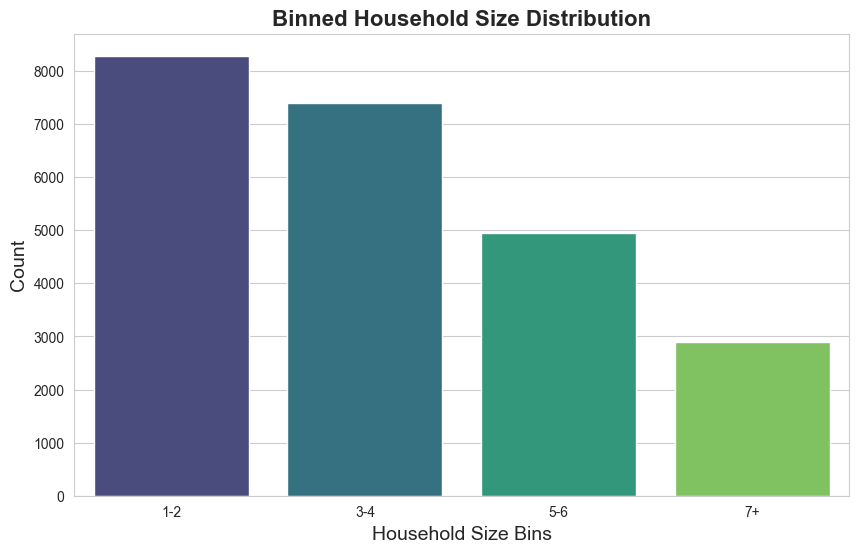

In [147]:
# Vizualizing household_size_binned column
plt.figure(figsize=(10, 6))
sns.countplot(x='household_size_binned', data=train, palette='viridis')
plt.xlabel('Household Size Bins', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Binned Household Size Distribution', fontsize=16, fontweight='bold')
plt.show()

In [148]:
# Dropping the household_size column
train = train.drop(columns=['household_size'])
train.head()

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned
0,Kenya,2018,Yes,Rural,Yes,24,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4
1,Kenya,2018,No,Rural,No,70,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6
2,Kenya,2018,Yes,Urban,Yes,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6
3,Kenya,2018,No,Rural,Yes,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6
4,Kenya,2018,No,Urban,No,26,Male,Child,Single/Never Married,Primary education,Informally employed,7+


In [149]:
# Transforming the household_size column for the test dataset
# Define bins and labels (grouping 7 and beyond into one bin)
bins = [0, 2, 4, 6, float('inf')]  # Custom bin ranges, 7 and beyond in the last bin
labels = ['1-2', '3-4', '5-6', '7+']  # Corresponding labels for the last group '7+'

# Apply binning
test['household_size_binned'] = pd.cut(
    test['household_size'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

# Display the distribution
print(test['household_size_binned'].value_counts())

# Display the first few rows of the updated dataset
test.head()

household_size_binned
1-2    3592
3-4    3130
5-6    2159
7+     1205
Name: count, dtype: int64


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,3-4
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,7+
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,3-4
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,5-6
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,3-4


In [150]:
# Dropping the household_size column
test = test.drop(columns=['household_size'])
test.head()

,country,year,uniqueid,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned
0,Kenya,2018,uniqueid_6056,Urban,Yes,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,3-4
1,Kenya,2018,uniqueid_6060,Urban,Yes,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,7+
2,Kenya,2018,uniqueid_6065,Rural,No,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,3-4
3,Kenya,2018,uniqueid_6072,Rural,No,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,5-6
4,Kenya,2018,uniqueid_6073,Urban,No,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,3-4


We can now proceed with the next column

## g. `age_of_respondent` column

In [151]:
train['age_of_respondent'].describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

The analysis reveals that interviewees' ages ranged from 16 to 100, with the majority falling between 26 and 49 years old.

In [152]:
# Checking distribution of unique values in the age_of_respondent column
train['age_of_respondent'].value_counts()

age_of_respondent
30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: count, Length: 85, dtype: int64

<Axes: xlabel='age_of_respondent', ylabel='Count'>

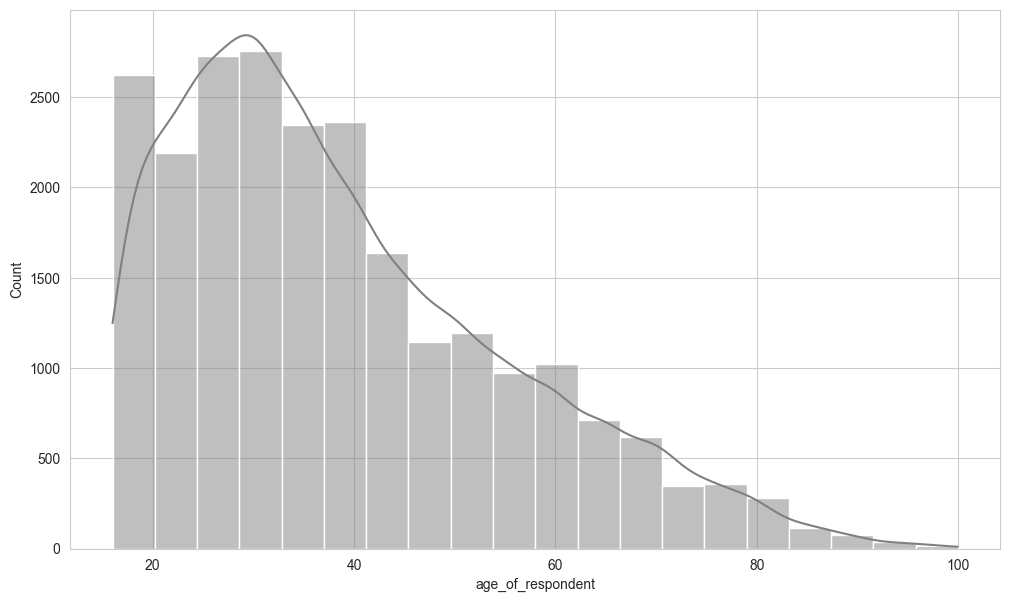

In [153]:
# Vizualizing the distribution of household sizes using a histogram
plt.figure(figsize=(12, 7))
sns.histplot(train['age_of_respondent'], bins=20, kde=True, color='grey')

<Axes: xlabel='age_of_respondent'>

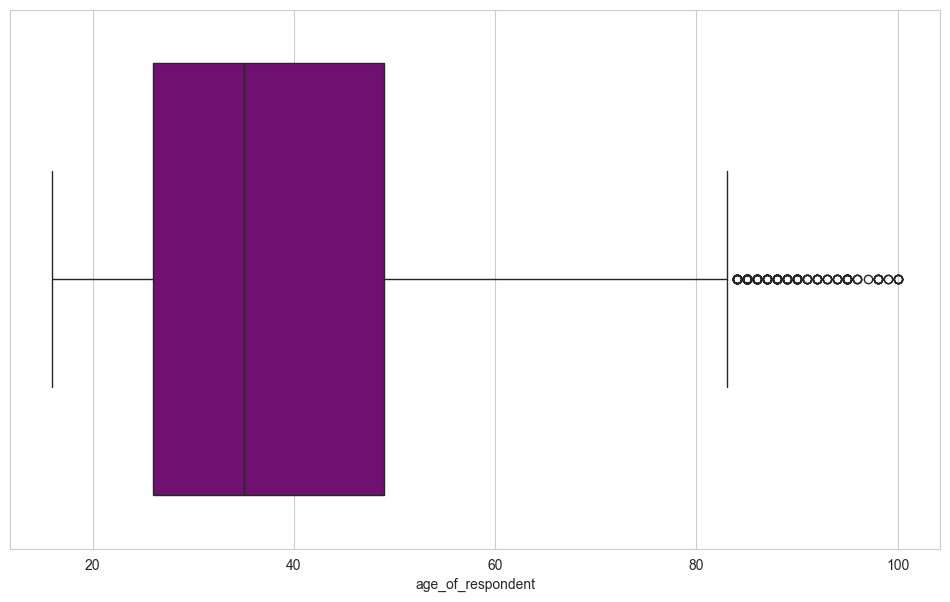

In [154]:
# Vizualizing this using a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='age_of_respondent', data=train, color='purple')

There exists outliers in the age column. Let us first confirm whether or not there is a relationship between this feature and the target variable.

In [155]:
# Checking for any relationship between the age_of_respondent and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['age_of_respondent'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'age_of_respondent' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'age_of_respondent' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 460.9312218964729
p-value: 2.1730292133477746e-53
Degrees of Freedom: 84
There is a significant relationship between 'age_of_respondent' and 'bank_account' (p < 0.05).


In [156]:
# Calculate Q1, Q3, and IQR
Q1 = train['age_of_respondent'].quantile(0.25)
Q3 = train['age_of_respondent'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['age_of_respondent'] < lower_bound) | (train['age_of_respondent'] > upper_bound)]

# Count the number of outliers
number_of_outliers = len(outliers)

print(f"Number of outliers in the age_of_respondent column: {number_of_outliers}")

Q1: 26.0
Q3: 49.0
IQR: 23.0
Number of outliers in the age_of_respondent column: 241


Given the `age_of_respondent` column has quite a significant relationship with the target variable, dealing with the outliers could lead to a positive improvement in model performance. This time however, let us apply **logarithmic scaling** given the bins here might not be that easy to deal with

In [157]:
# Apply logarithmic scaling
train['age_of_respondent_log'] = np.log1p(train['age_of_respondent'])  # np.log1p handles log(0) safely

# Display the transformed column
print(train[['age_of_respondent', 'age_of_respondent_log']].head())

   age_of_respondent  age_of_respondent_log
0                 24               3.218876
1                 70               4.262680
2                 26               3.295837
3                 34               3.555348
4                 26               3.295837


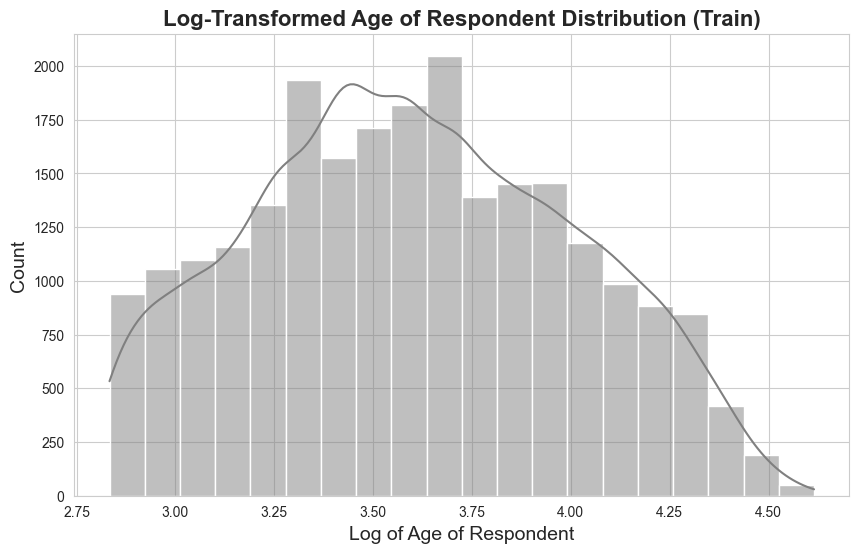

In [158]:
# Visualize the log-transformed household sizes
plt.figure(figsize=(10, 6))
sns.histplot(train['age_of_respondent_log'], kde=True, color='grey', bins=20)
plt.xlabel('Log of Age of Respondent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Log-Transformed Age of Respondent Distribution (Train)', fontsize=16, fontweight='bold')
plt.show()

This is now a better distribution compared to the previous one. Let us now do away with the `age_of_respondent` column then repeat this process for the test dataset. Note that we do not have to transform the test dataset at this point as we can always handle these transformations when inferencing. It's your choice really. I will do both.

In [159]:
# Dropping the age_of_respondent column
train = train.drop(columns=['age_of_respondent'])
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837


   age_of_respondent  age_of_respondent_log
0                 30               3.433987
1                 51               3.951244
2                 77               4.356709
3                 39               3.688879
4                 16               2.833213


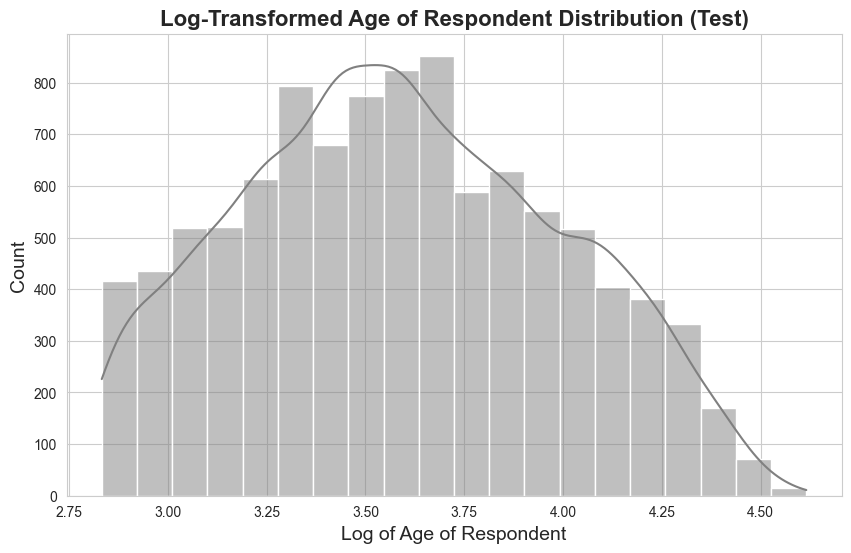

In [160]:
# Apply logarithmic scaling
test['age_of_respondent_log'] = np.log1p(test['age_of_respondent'])  # np.log1p handles log(0) safely

# Display the transformed column
print(test[['age_of_respondent', 'age_of_respondent_log']].head())

# Visualize the log-transformed household sizes
plt.figure(figsize=(10, 6))
sns.histplot(test['age_of_respondent_log'], kde=True, color='grey', bins=20)
plt.xlabel('Log of Age of Respondent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Log-Transformed Age of Respondent Distribution (Test)', fontsize=16, fontweight='bold')
plt.show()

In [161]:
# Dropping the age_of_respondent column
test = test.drop(columns=['age_of_respondent'])
test.head()

,country,year,uniqueid,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,uniqueid_6056,Urban,Yes,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,3-4,3.433987
1,Kenya,2018,uniqueid_6060,Urban,Yes,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,7+,3.951244
2,Kenya,2018,uniqueid_6065,Rural,No,Female,Parent,Married/Living together,No formal education,Remittance Dependent,3-4,4.356709
3,Kenya,2018,uniqueid_6072,Rural,No,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,5-6,3.688879
4,Kenya,2018,uniqueid_6073,Urban,No,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,3-4,2.833213


## h. `gender_of_respondent` column

In [162]:
train['gender_of_respondent'].describe()

count      23524
unique         2
top       Female
freq       13877
Name: gender_of_respondent, dtype: object

The `gender_of_respondent` column is complete, with no missing values, and contains two unique categories. The most frequent category is "Female."

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\3047126638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


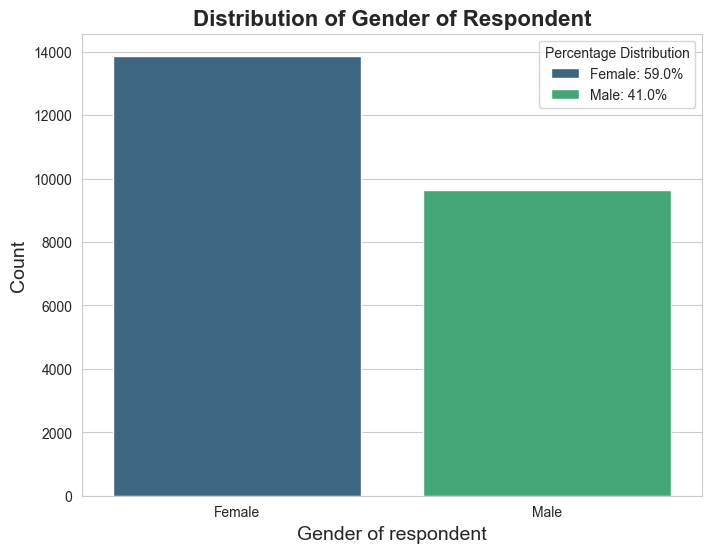

In [163]:
# Calculate percentage distribution
value_counts = train['gender_of_respondent'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Visualizing the distribution of values in the 'gender_of_respondent' column
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Creating the countplot
sns.countplot(
    x='gender_of_respondent', 
    data=train, 
    palette='viridis'
)

# Adding labels and title
plt.xlabel('Gender of respondent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Gender of Respondent', fontsize=16, fontweight='bold')

# Adding a legend with percentage distribution
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels, title='Percentage Distribution', loc='upper right')

# Display the plot
plt.show()

Given this balanced distribution, bias is unlikely to be a concern. Let’s now examine how this feature correlates with the target variable.

In [164]:
# Checking for any relationship between the gender_of_respondent and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['gender_of_respondent'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'gender_of_respondent' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'gender_of_respondent' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 322.62384989978455
p-value: 3.884875437093037e-72
Degrees of Freedom: 1
There is a significant relationship between 'gender_of_respondent' and 'bank_account' (p < 0.05).


In [165]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837


## i. `relationship_with_head` column

In [166]:
train['relationship_with_head'].describe()

count                 23524
unique                    6
top       Head of Household
freq                  12831
Name: relationship_with_head, dtype: object

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\2398348196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


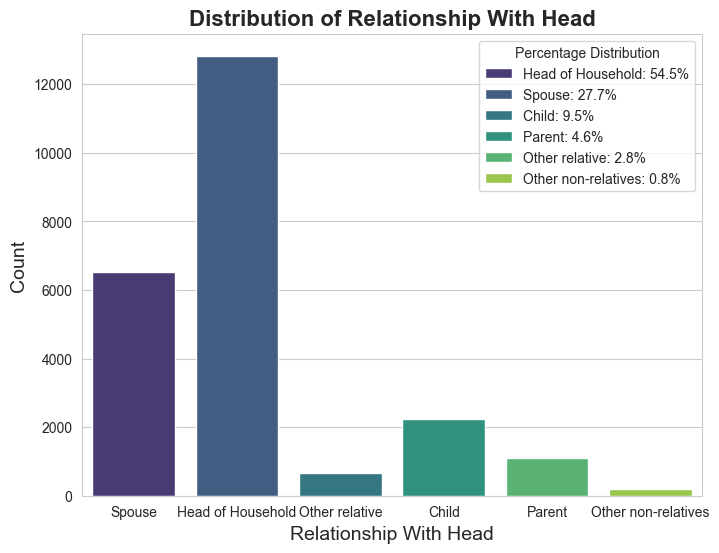

In [167]:
# Calculate percentage distribution
value_counts = train['relationship_with_head'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Visualizing the distribution of values in the 'relationship_with_head' column
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Creating the countplot
sns.countplot(
    x='relationship_with_head', 
    data=train, 
    palette='viridis'
)

# Adding labels and title
plt.xlabel('Relationship With Head', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Relationship With Head', fontsize=16, fontweight='bold')

# Adding a legend with percentage distribution
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels, title='Percentage Distribution', loc='upper right')

# Display the plot
plt.show()

Class imbalance here is an issue that needs to be resolved. We will employ oversampling as earlier discussed.

In [168]:
# Checking for any relationship between the relationship_with_head and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['relationship_with_head'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'relationship_with_head' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'relationship_with_head' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 327.90665554178617
p-value: 9.9629019270655e-69
Degrees of Freedom: 5
There is a significant relationship between 'relationship_with_head' and 'bank_account' (p < 0.05).


In [169]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837


## j. `marital_status` column

In [170]:
train['marital_status'].describe()

count                       23524
unique                          5
top       Married/Living together
freq                        10749
Name: marital_status, dtype: object

The `marital_status` column contains no null values and includes five unique categories. The majority of interviewees are categorized as married or living together, making it the most prevalent marital status in the dataset.

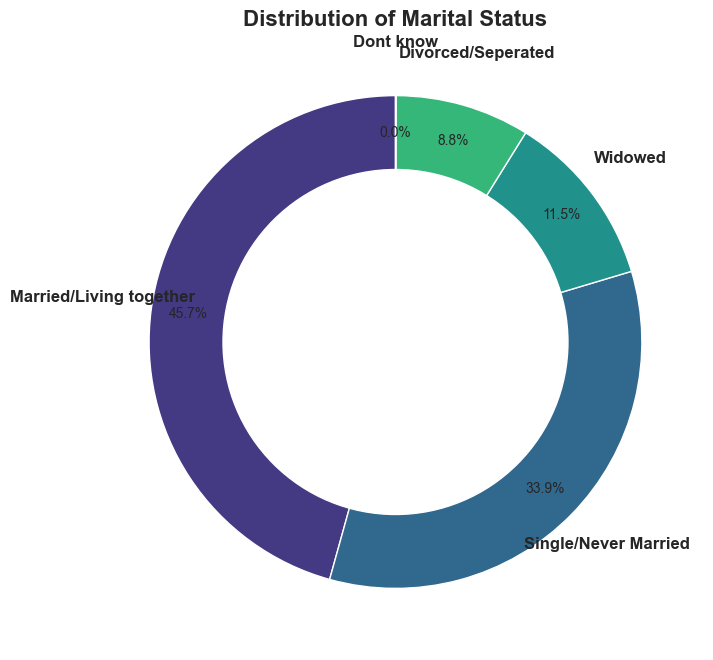

In [171]:
# Calculate percentage distribution
value_counts = train['marital_status'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    percentages, 
    labels=None,  # Remove default labels
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('viridis', len(value_counts)),
    pctdistance=0.85
)

# Adding a circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add labels outside the chart, with a slight angle adjustment to avoid overlap
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = 1.2 * np.cos(np.deg2rad(ang))  # Adjusted distance from the center
    y = 1.2 * np.sin(np.deg2rad(ang))  # Adjusted distance from the center
    plt.annotate(f'{value_counts.index[i]}', xy=(x, y), ha='center', fontsize=12, fontweight='bold')

# Adding title
plt.title('Distribution of Marital Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

Class imbalance noted in this column especially classes such as `Don't Know` having very few data points (close to 0%)

In [172]:
# Checking for any relationship between the marital_status and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['marital_status'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'marital_status' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'marital_status' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 193.29187150436812
p-value: 1.03957918709173e-40
Degrees of Freedom: 4
There is a significant relationship between 'marital_status' and 'bank_account' (p < 0.05).


## k. `education_level` column

In [173]:
train['education_level'].describe()

count                 23524
unique                    6
top       Primary education
freq                  12791
Name: education_level, dtype: object

The `education_level` column has no null values and includes 6 unique categories with most interviewees appearing to have attained Primary education mostly.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\358965361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education_level', data=train, palette='viridis')


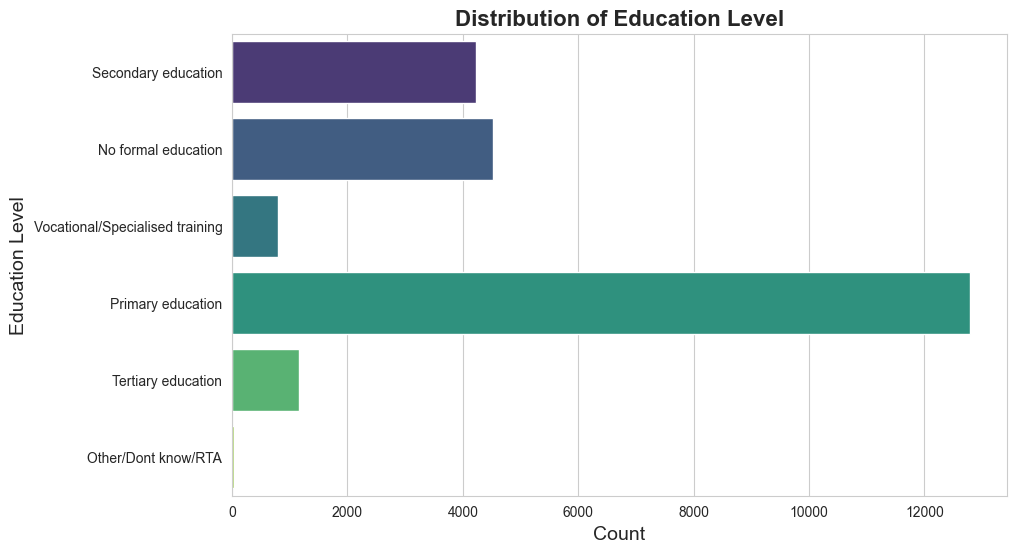

In [174]:
plt.figure(figsize=(10, 6))
sns.countplot(y='education_level', data=train, palette='viridis')

# Adding labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.title('Distribution of Education Level', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [175]:
# Checking for any relationship between the education_level and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['education_level'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'education_level' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'education_level' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 3549.125449633797
p-value: 0.0
Degrees of Freedom: 5
There is a significant relationship between 'education_level' and 'bank_account' (p < 0.05).


In [176]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837


## l. `job_type` column

In [177]:
train['job_type'].describe()

count             23524
unique               10
top       Self employed
freq               6437
Name: job_type, dtype: object

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\539632988.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='job_type', data=train, palette='viridis')


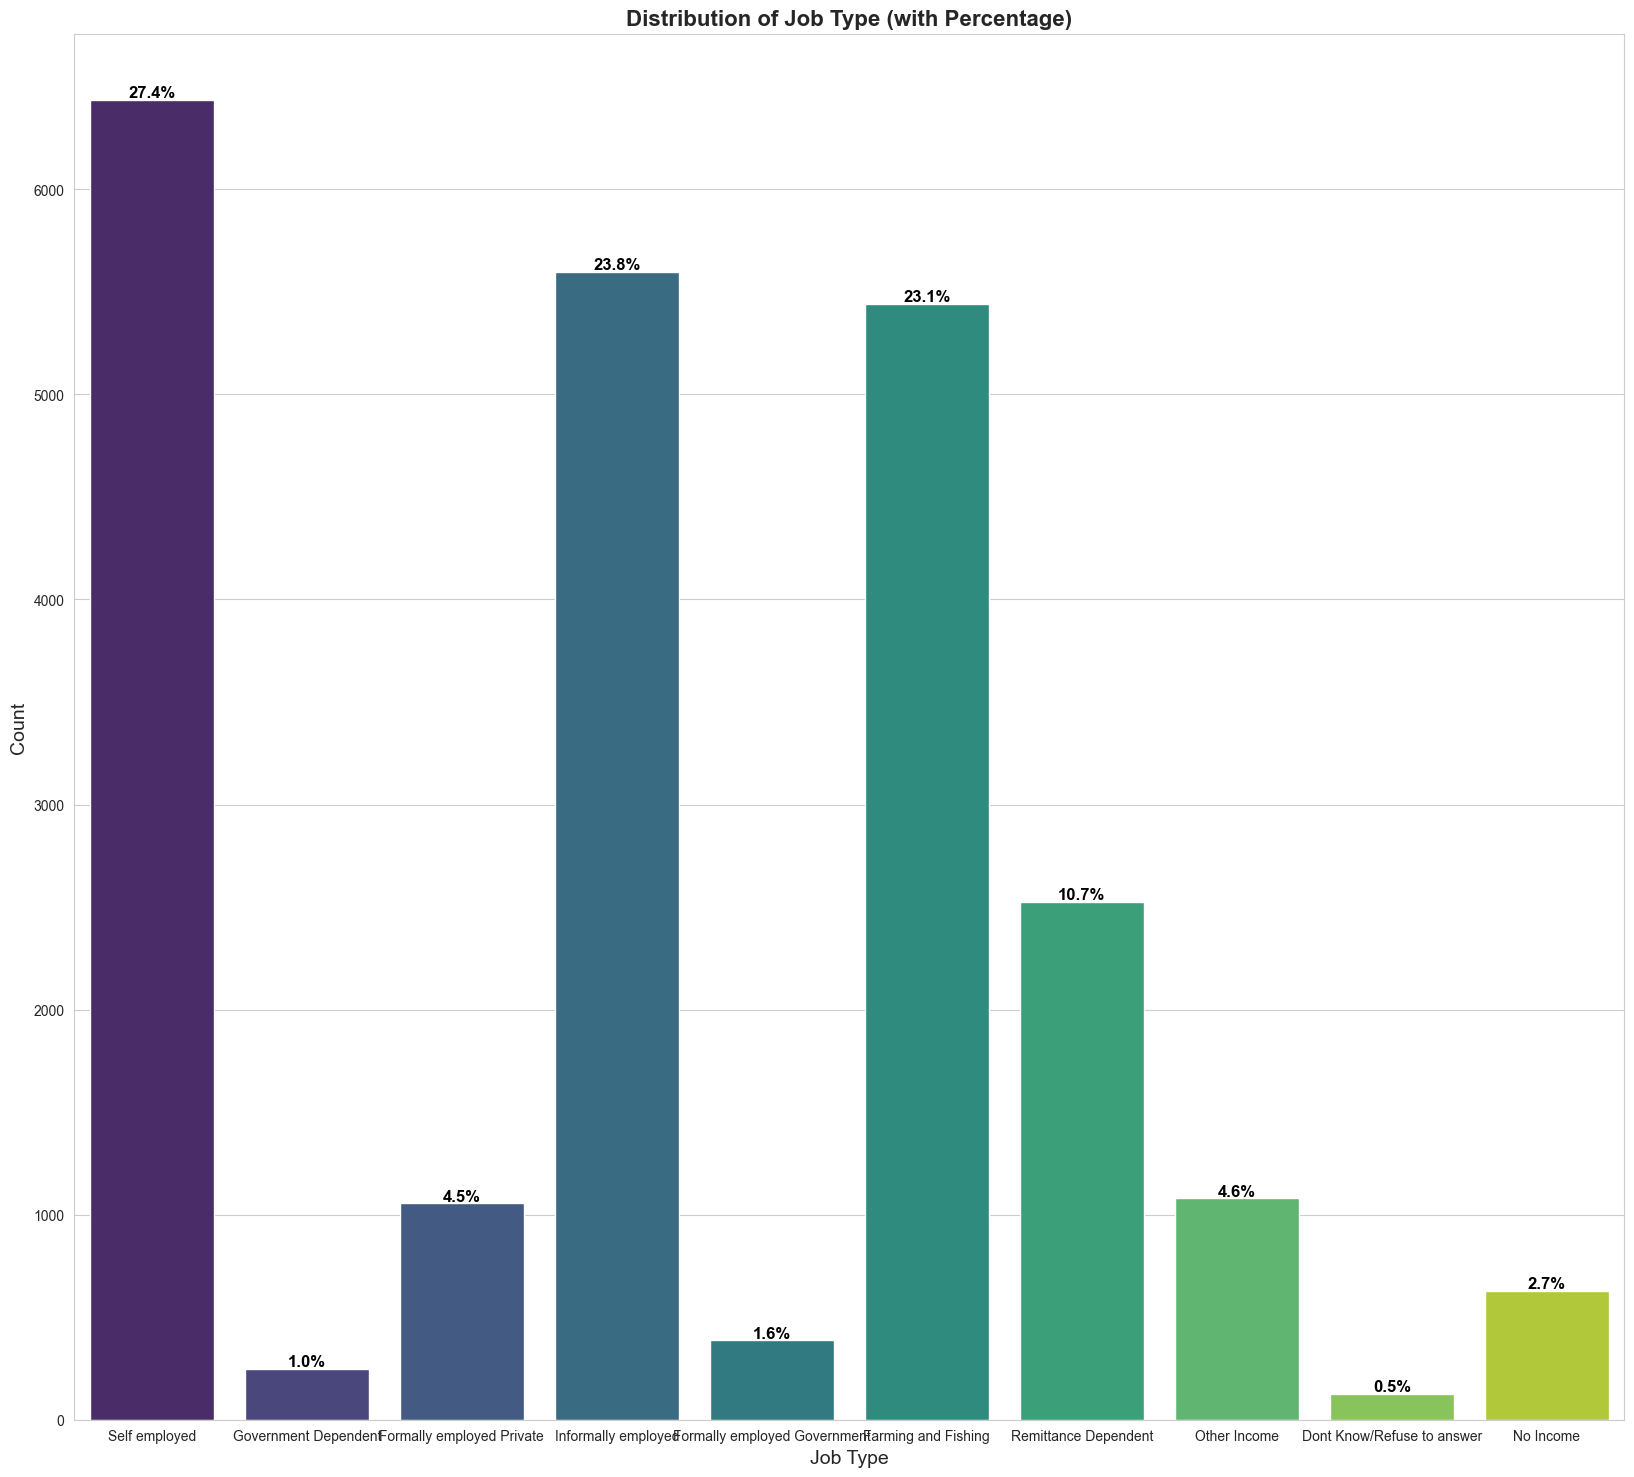

In [178]:
# Calculate percentage distribution
value_counts = train['job_type'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Plot the count plot and annotate the percentages
plt.figure(figsize=(20, 18))
ax = sns.countplot(x='job_type', data=train, palette='viridis')

# Annotating the bar plot with percentage distribution
for p in ax.patches:
    height = p.get_height()
    percentage = (height / len(train)) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                fontsize=12, 
                fontweight='bold', 
                color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding labels and title
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Job Type (with Percentage)', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

We will also need to carry out oversampling here.

In [179]:
# Checking for any relationship between the job_type and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['job_type'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'job_type' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'job_type' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 3032.254227408195
p-value: 0.0
Degrees of Freedom: 9
There is a significant relationship between 'job_type' and 'bank_account' (p < 0.05).


## m. target variable- `bank_account`column

In [180]:
train['bank_account'].describe()

count     23524
unique        2
top          No
freq      20212
Name: bank_account, dtype: object

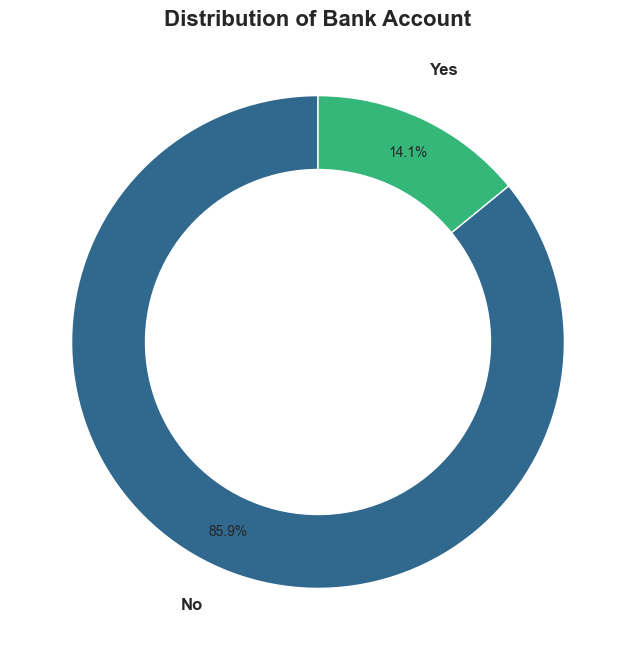

In [181]:
# Calculate percentage distribution
value_counts = train['bank_account'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    percentages, 
    labels=None,  # Remove default labels
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('viridis', len(value_counts)),
    pctdistance=0.85
)

# Adding a circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add labels outside the chart, with a slight angle adjustment to avoid overlap
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    x = 1.2 * np.cos(np.deg2rad(ang))  # Adjusted distance from the center
    y = 1.2 * np.sin(np.deg2rad(ang))  # Adjusted distance from the center
    plt.annotate(f'{value_counts.index[i]}', xy=(x, y), ha='center', fontsize=12, fontweight='bold')

# Adding title
plt.title('Distribution of Bank Account', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

Most of the interviewees, 85.9%, in the dataset do not have access to a bank account. Given this is the target variable, we will use techniques like SMOTE or SMOTETomek (A combination of SMOTE and Tomek Links) to ensure that there's a balance. But first, let us carry out some feature engineering.

# Insights from the EDA

After conducting Exploratory Data Analysis (EDA), the following key insights and considerations were identified:

1. **Data Completeness**:  
   All columns in the dataset are complete, with no missing values detected. All independent features showcase a high relationship with the dependent variable.

2. **Feature Imbalance**:  
   Several features exhibit class imbalances that could introduce model bias:
   - `country`, `year`, `location_type`, `cellphone_access`, `relationship_with_head`, `marital_status`, `education_level`, and `job_type`. :  
     Certain classes in these features are underrepresented, which may skew predictions toward the overrepresented classes. Oversampling techniques will be applied to balance these features.  
   - **Target Variable (`bank_account`)**:  
     The target variable is imbalanced, requiring **SMOTETomek** to equalize the two categories (`Yes` and `No`) during preprocessing.

3. **Geographic and Temporal Scope**:  
   The dataset focuses on respondents from four East African countries: Kenya, Rwanda, Tanzania, and Uganda. Data collection spans three years: 2016, 2017, and 2018. This scope implies that the model will only be applicable within these countries and years.

4. **Urban-Rural Distribution**:  
   A majority (61%) of the respondents reside in rural areas, while 39% are from urban areas. 

5. **Cellphone Access**:  
   Approximately 74% of respondents have access to a cellphone, indicating high mobile connectivity among the interviewees.

6. **Household Size**:  
   Household sizes range from 1 to 21, with notable outliers. To address this, household sizes were binned into groups of 2, ranging from "1-2" to "7+". This transformation standardizes the feature and aligns with subsequent modeling requirements. The same transformation has been applied to the test dataset for consistency.

7. **Age of Respondents**:  
   Ages range from 16 to 100, with a mean age of 38.8. The majority of respondents fall between 26 and 49 years. A logarithmic transformation was applied to standardize this feature (`Ln(age)`), which will also need to be adopted during inferencing.

8. **Gender**:  
   Females constitute 59% of the respondents, while males make up 41%.

9. **Marital Status**:  
   The majority of respondents (45.7%) are married or living together.

10. **Relationship to Household Head**:  
    More than half (54.5%) of the respondents are the heads of their households.

11. **Education Level and Employment**:  
    - Most respondents have primary-level education as their highest attained level.  
    - Regarding employment, 27.4% of respondents are self-employed, while 23.8% and 23.1% are engaged in informal employment and farming/fishing activities, respectively.

---

### Key Takeaways and Next Steps

- To address feature imbalances, oversampling will be applied to specific independent variables. Careful attention will be given to avoid oversampling the same portion of the dataset used for validation to prevent data leakage.  
- Standardized transformations (e.g., for `age_of_respondent` and `household_size`) must be maintained during model inference.  
- The dataset's demographic distribution and geographic scope highlight the importance of tailoring the model for East African populations within the specified timeframe.  

---

In [182]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837


# 3. Feature Engineering.

**Feature Engineering Overview**  
Feature engineering is the process of transforming raw data into meaningful input features to improve the performance of machine learning models. Below are the planned features to enhance the dataset:

1. **`geographical_location`**:  
   This feature will combine `country` and `location_type` to capture the interaction between a respondent's location (rural/urban) and their country. This is expected to add spatial context, highlighting differences in rural and urban trends across countries.

   **Steps to Improve**:  
   - Using one-hot encoding for this feature to preserve interpretability.  
   - Validating its importance during model training to ensure it captures meaningful interactions.  

2. **`age_gender`**:  
   By combining `age` and `gender`, this feature will represent demographic insights in a single variable. For instance, patterns in financial behavior might differ significantly between younger males and older females.  

   **Steps to Improve**:  
   - Using age bins (e.g., 16-25, 26-35, etc.) to reduce the risk of overfitting caused by raw numerical values.  
   - Considering representing this feature as a categorical variable, e.g., `young_male`, `middle-aged_female`, etc.  

3. **`job_education`**:  
   This feature will merge `education_level` and `job_type` to encapsulate the relationship between educational background and employment type. This can help identify trends such as higher financial inclusion among formally employed individuals with secondary or tertiary education.

   **Steps to Improve**: 
   - Using meaningful labels (e.g., `primary_farmer`, `tertiary_self-employed`) for easier interpretability and analysis.  

## a. `geographical_location` column

In [183]:
# Create the new feature 'geographical_location'
train['geographical_location'] = train['country'] + '_' + train['location_type']

# Inspect the first few rows to confirm
print(train[['country', 'location_type', 'geographical_location']].head())

# Check the unique values to ensure correctness
print(train['geographical_location'].value_counts())

  country location_type geographical_location
0   Kenya         Rural           Kenya_Rural
1   Kenya         Rural           Kenya_Rural
2   Kenya         Urban           Kenya_Urban
3   Kenya         Rural           Kenya_Rural
4   Kenya         Urban           Kenya_Urban
geographical_location
Rwanda_Rural      7483
Tanzania_Urban    4811
Kenya_Rural       3543
Kenya_Urban       2525
Tanzania_Rural    1809
Uganda_Rural      1508
Rwanda_Urban      1252
Uganda_Urban       593
Name: count, dtype: int64


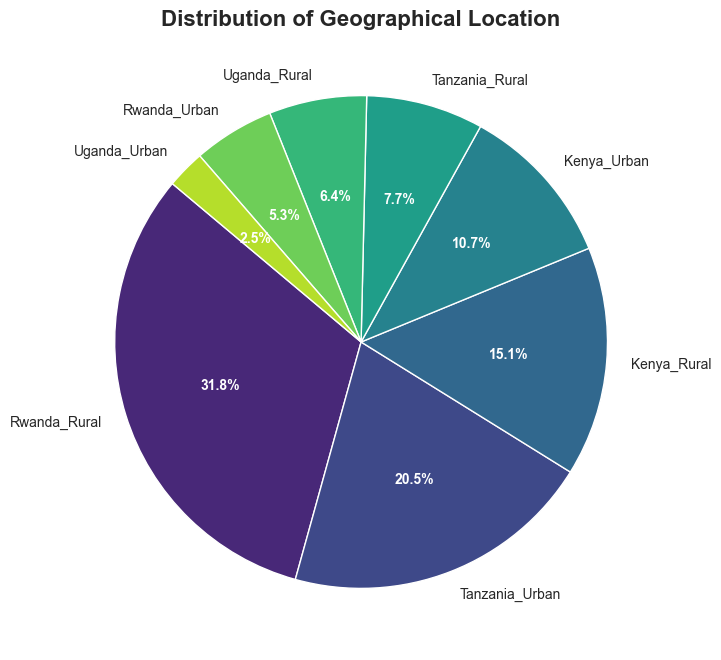

In [184]:
# Calculate the percentage distribution
geo_counts = train['geographical_location'].value_counts()
geo_percentages = (geo_counts / geo_counts.sum()) * 100

# Set up the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    geo_percentages,
    labels=geo_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(geo_counts))
)

# Customize text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add a title
plt.title('Distribution of Geographical Location', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

In [192]:
# Checking for any relationship between the geographical_location and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['geographical_location'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'geographical_location' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'geographical_location' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 2067.101691735894
p-value: 0.0
Degrees of Freedom: 7
There is a significant relationship between 'geographical_location' and 'bank_account' (p < 0.05).


In [185]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log,geographical_location
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876,Kenya_Rural
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680,Kenya_Rural
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837,Kenya_Urban
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348,Kenya_Rural
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837,Kenya_Urban


## b. `age_gender` column

In [187]:
# Create the age_gender feature
train['age_gender'] = train['age_of_respondent_log'].astype(str) + '_' + train['gender_of_respondent']

# Preview the new feature
print(train[['age_of_respondent_log', 'gender_of_respondent', 'age_gender']].head())

   age_of_respondent_log gender_of_respondent                 age_gender
0               3.218876               Female  3.2188758248682006_Female
1               4.262680               Female  4.2626798770413155_Female
2               3.295837                 Male     3.295836866004329_Male
3               3.555348               Female  3.5553480614894135_Female
4               3.295837                 Male     3.295836866004329_Male


In [193]:
# Checking for any relationship between the age_gender and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['age_gender'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'age_gender' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'age_gender' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 889.956452269003
p-value: 4.889157468967964e-99
Degrees of Freedom: 167
There is a significant relationship between 'age_gender' and 'bank_account' (p < 0.05).


In [188]:
train.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,household_size_binned,age_of_respondent_log,geographical_location,age_gender
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3-4,3.218876,Kenya_Rural,3.2188758248682006_Female
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,5-6,4.262680,Kenya_Rural,4.2626798770413155_Female
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,5-6,3.295837,Kenya_Urban,3.295836866004329_Male
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,5-6,3.555348,Kenya_Rural,3.5553480614894135_Female
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,7+,3.295837,Kenya_Urban,3.295836866004329_Male


## c. `job_education` column

In [189]:
# Create the new feature 'job_education'
train['job_education'] = train['job_type'] + '_' + train['education_level']

# Inspect the first few rows to confirm
print(train[['job_type', 'education_level', 'job_education']].head())

# Check the unique values to ensure correctness
print(train['job_education'].value_counts())

                    job_type                  education_level  \
0              Self employed              Secondary education   
1       Government Dependent              No formal education   
2              Self employed  Vocational/Specialised training   
3  Formally employed Private                Primary education   
4        Informally employed                Primary education   

                                   job_education  
0              Self employed_Secondary education  
1       Government Dependent_No formal education  
2  Self employed_Vocational/Specialised training  
3    Formally employed Private_Primary education  
4          Informally employed_Primary education  
job_education
Self employed_Primary education                                 4056
Informally employed_Primary education                           3407
Farming and Fishing_Primary education                           3006
Farming and Fishing_No formal education                         1405
Informally em

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4160\77836925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


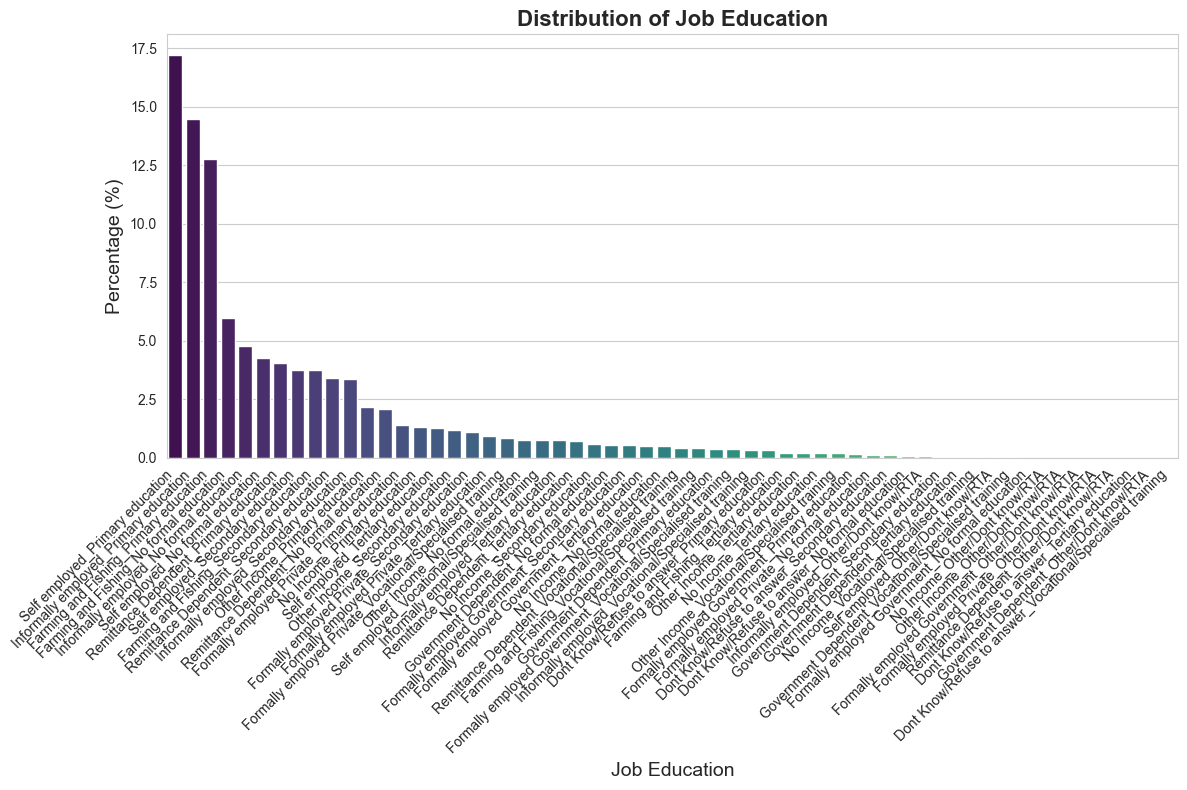

In [191]:
# Calculate the percentage distribution
job_edu_counts = train['job_education'].value_counts()
job_edu_percentages = (job_edu_counts / job_edu_counts.sum()) * 100

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x=job_edu_percentages.index,
    y=job_edu_percentages.values,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Job Education', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Distribution of Job Education', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [194]:
# Checking for any relationship between the job_education and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['job_education'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'job_education' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'job_education' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 5328.673426252694
p-value: 0.0
Degrees of Freedom: 57
There is a significant relationship between 'job_education' and 'bank_account' (p < 0.05).


# 4. Preparing Data For Modelling.